## NLP 前沿模型

### 介绍

在上两个实验中都涉及到了注意力机制，本质上计算的是两个文本间的注意力关系，能够更有效更有重点地处理信息。那么，在一个文本中，各词汇间是否也可以进行注意力的计算呢？回答是肯定的，这就是所谓的自注意力机制，即本实验的重点内容，主要包括以下知识点：

#### 知识点

- 自注意力机制
- NLP 前沿模型
- NLP 前沿库 transformers

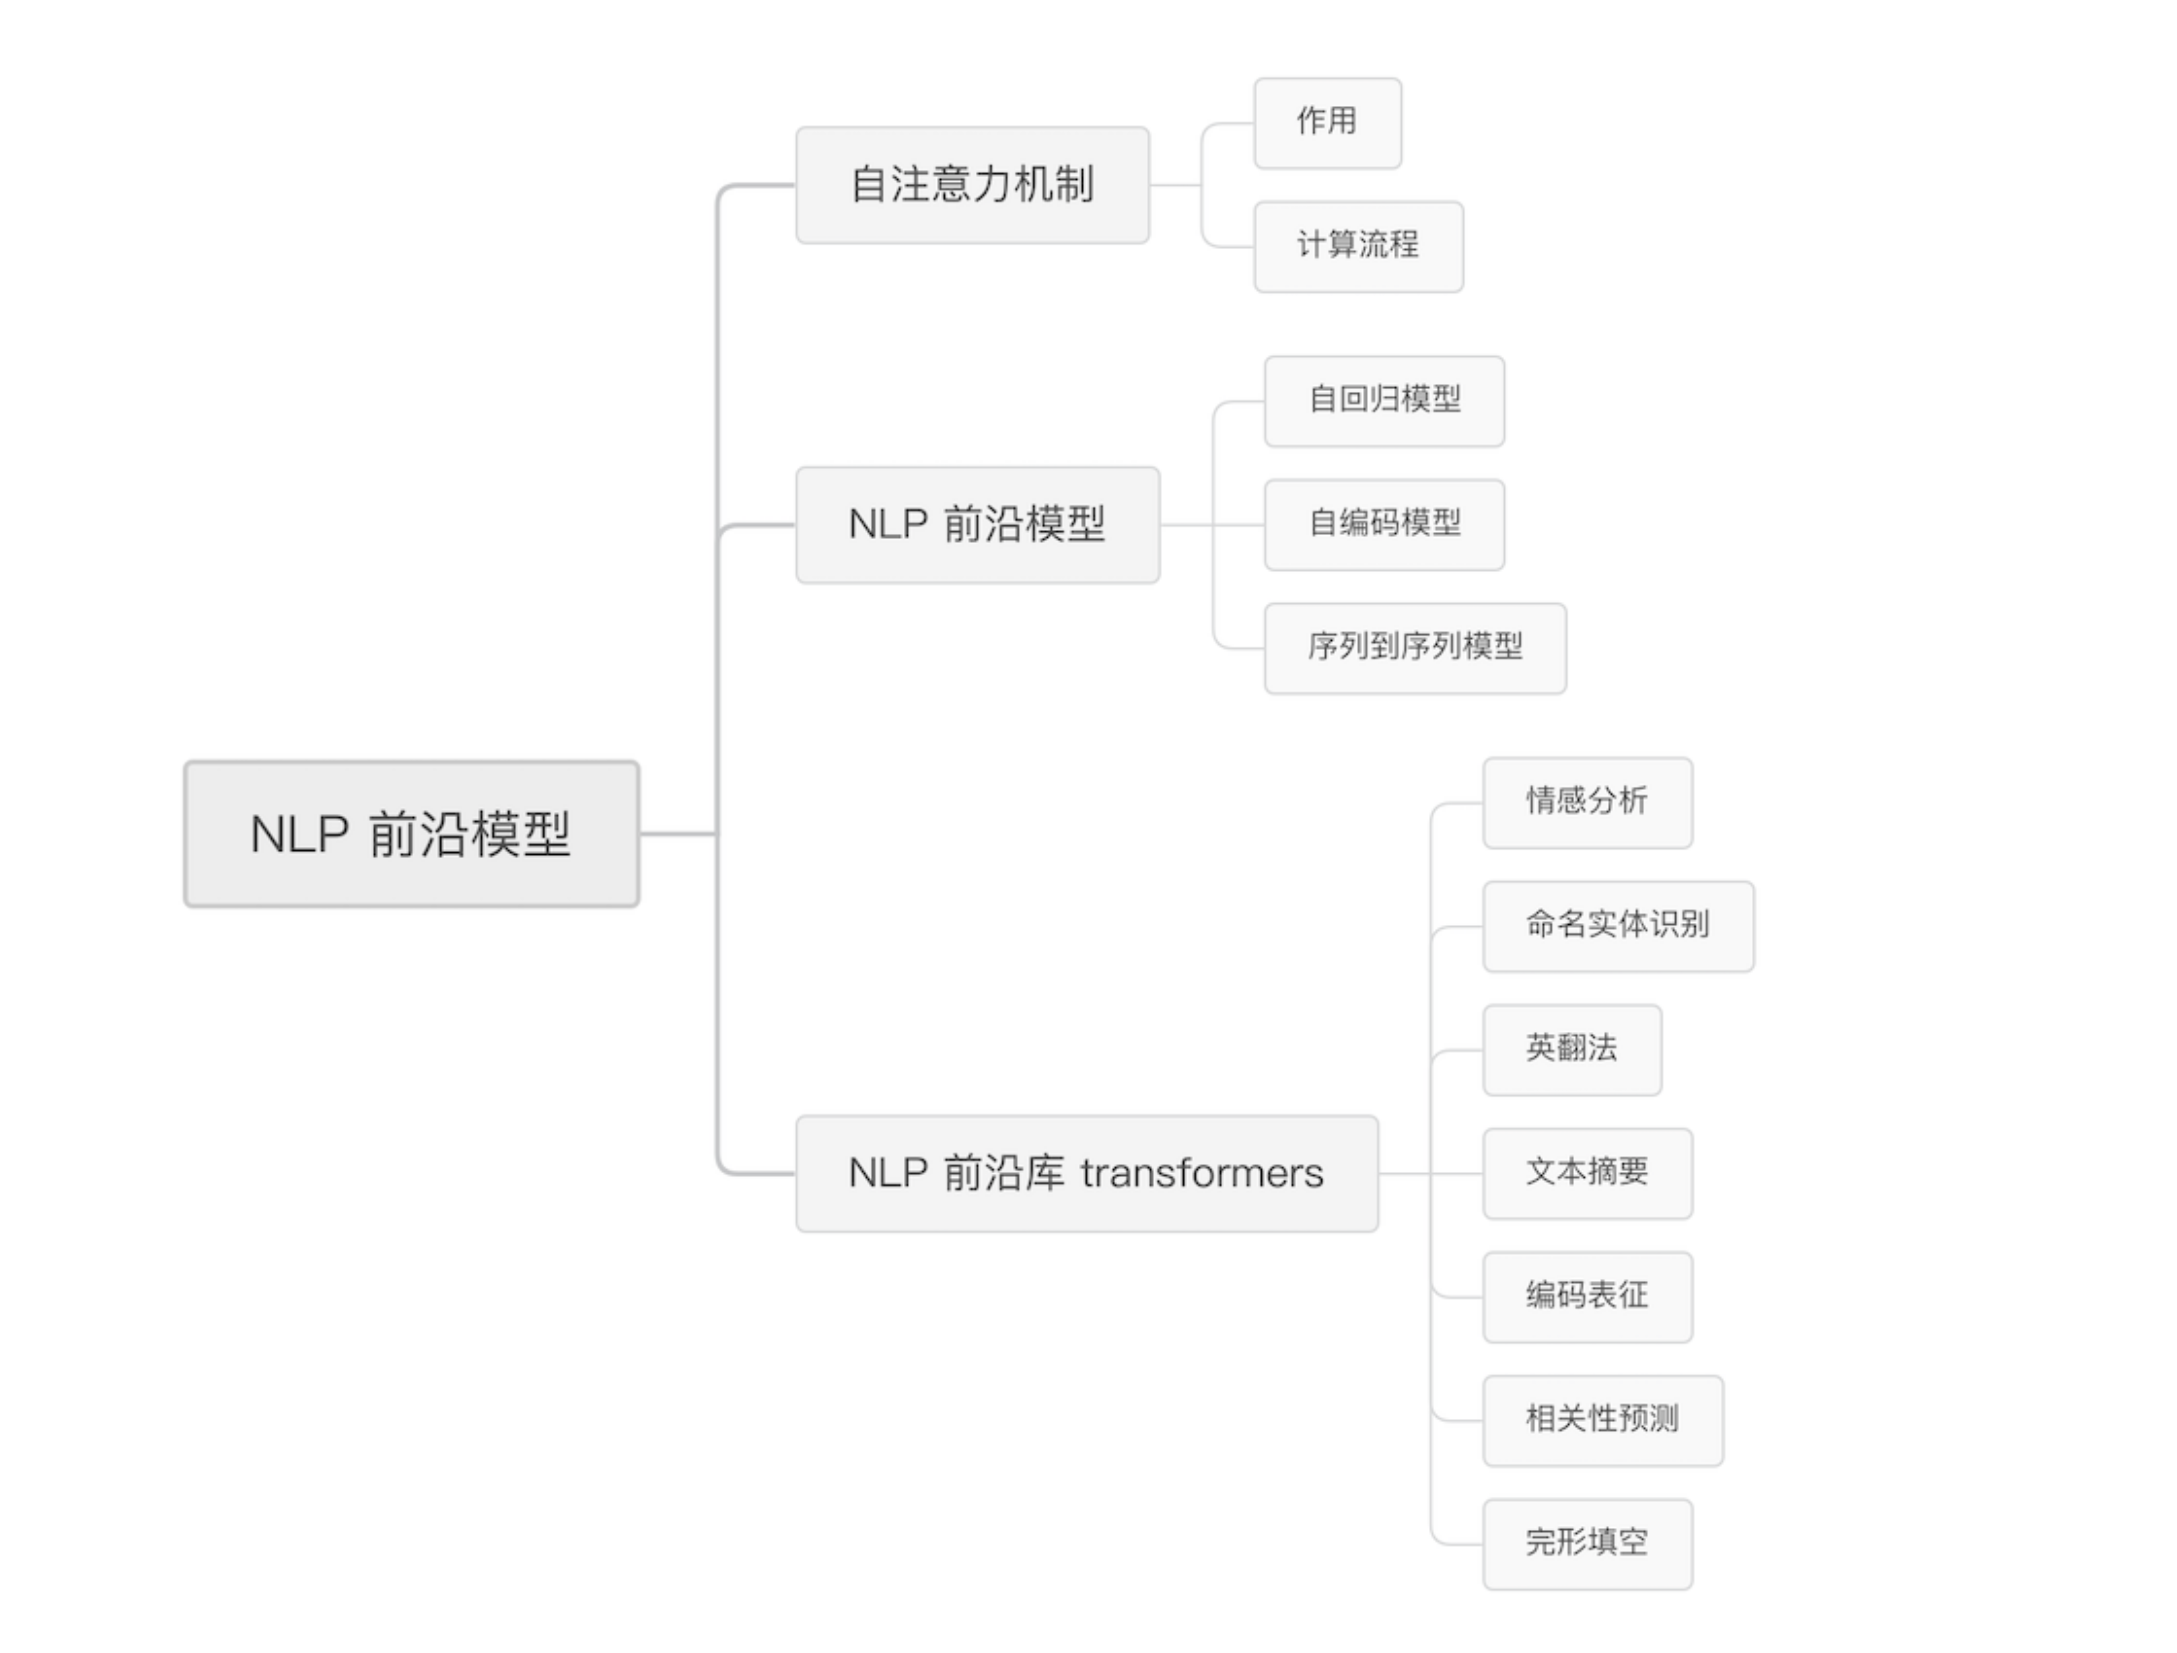

### 自注意力机制

介绍中提到了自注意力机制，即同一文本中词汇间的注意力关系，计算这些关系有什么用呢？看如下的例子：

The animal didn't cross the street because it was too wide.

句子中的 it 指的是 street 还是 animal？利用自注意力模型的编码器，可以自主学习出同一句话中 <font color=#0099ff>词与词</font>之间的联系，有重点地基于<font color=#0099ff>语境</font>解读某个单词，因此获得更多更深层次的编码信息。2017 年，谷歌机器翻译团队<font color=#0099ff>完全摒弃</font>了循环神经网络结构，提出的完全基于自注意力机制的 Transformer 模型在机器翻译任务上又取得了新的进展。在 Transformer 中，编码器及解码器均是基于自注意力机制，完全摒弃使用循环神经网络结构，对于 <font color=#0099ff>长句</font>的处理能力以及运算速度大幅提升。

而在 Transformer 之后，又有更多的基于自注意力机制的前沿模型被提出，不断刷新 NLP 的任务榜单，可以说，自注意力机制是现今最为强大的编码机制。

对于输入的文本，如何计算自注意力机制呢？假设输入的文本为 Thinking machines，首先对于每个单词，创建一个查询向量（query），一个键向量 (key)和一个值向量 (value)，简称为 q、k、v， 通过将词嵌入（embedding）分别乘以三个参数矩阵(也就是三个 W)，来创建这些向量，如下图所示：

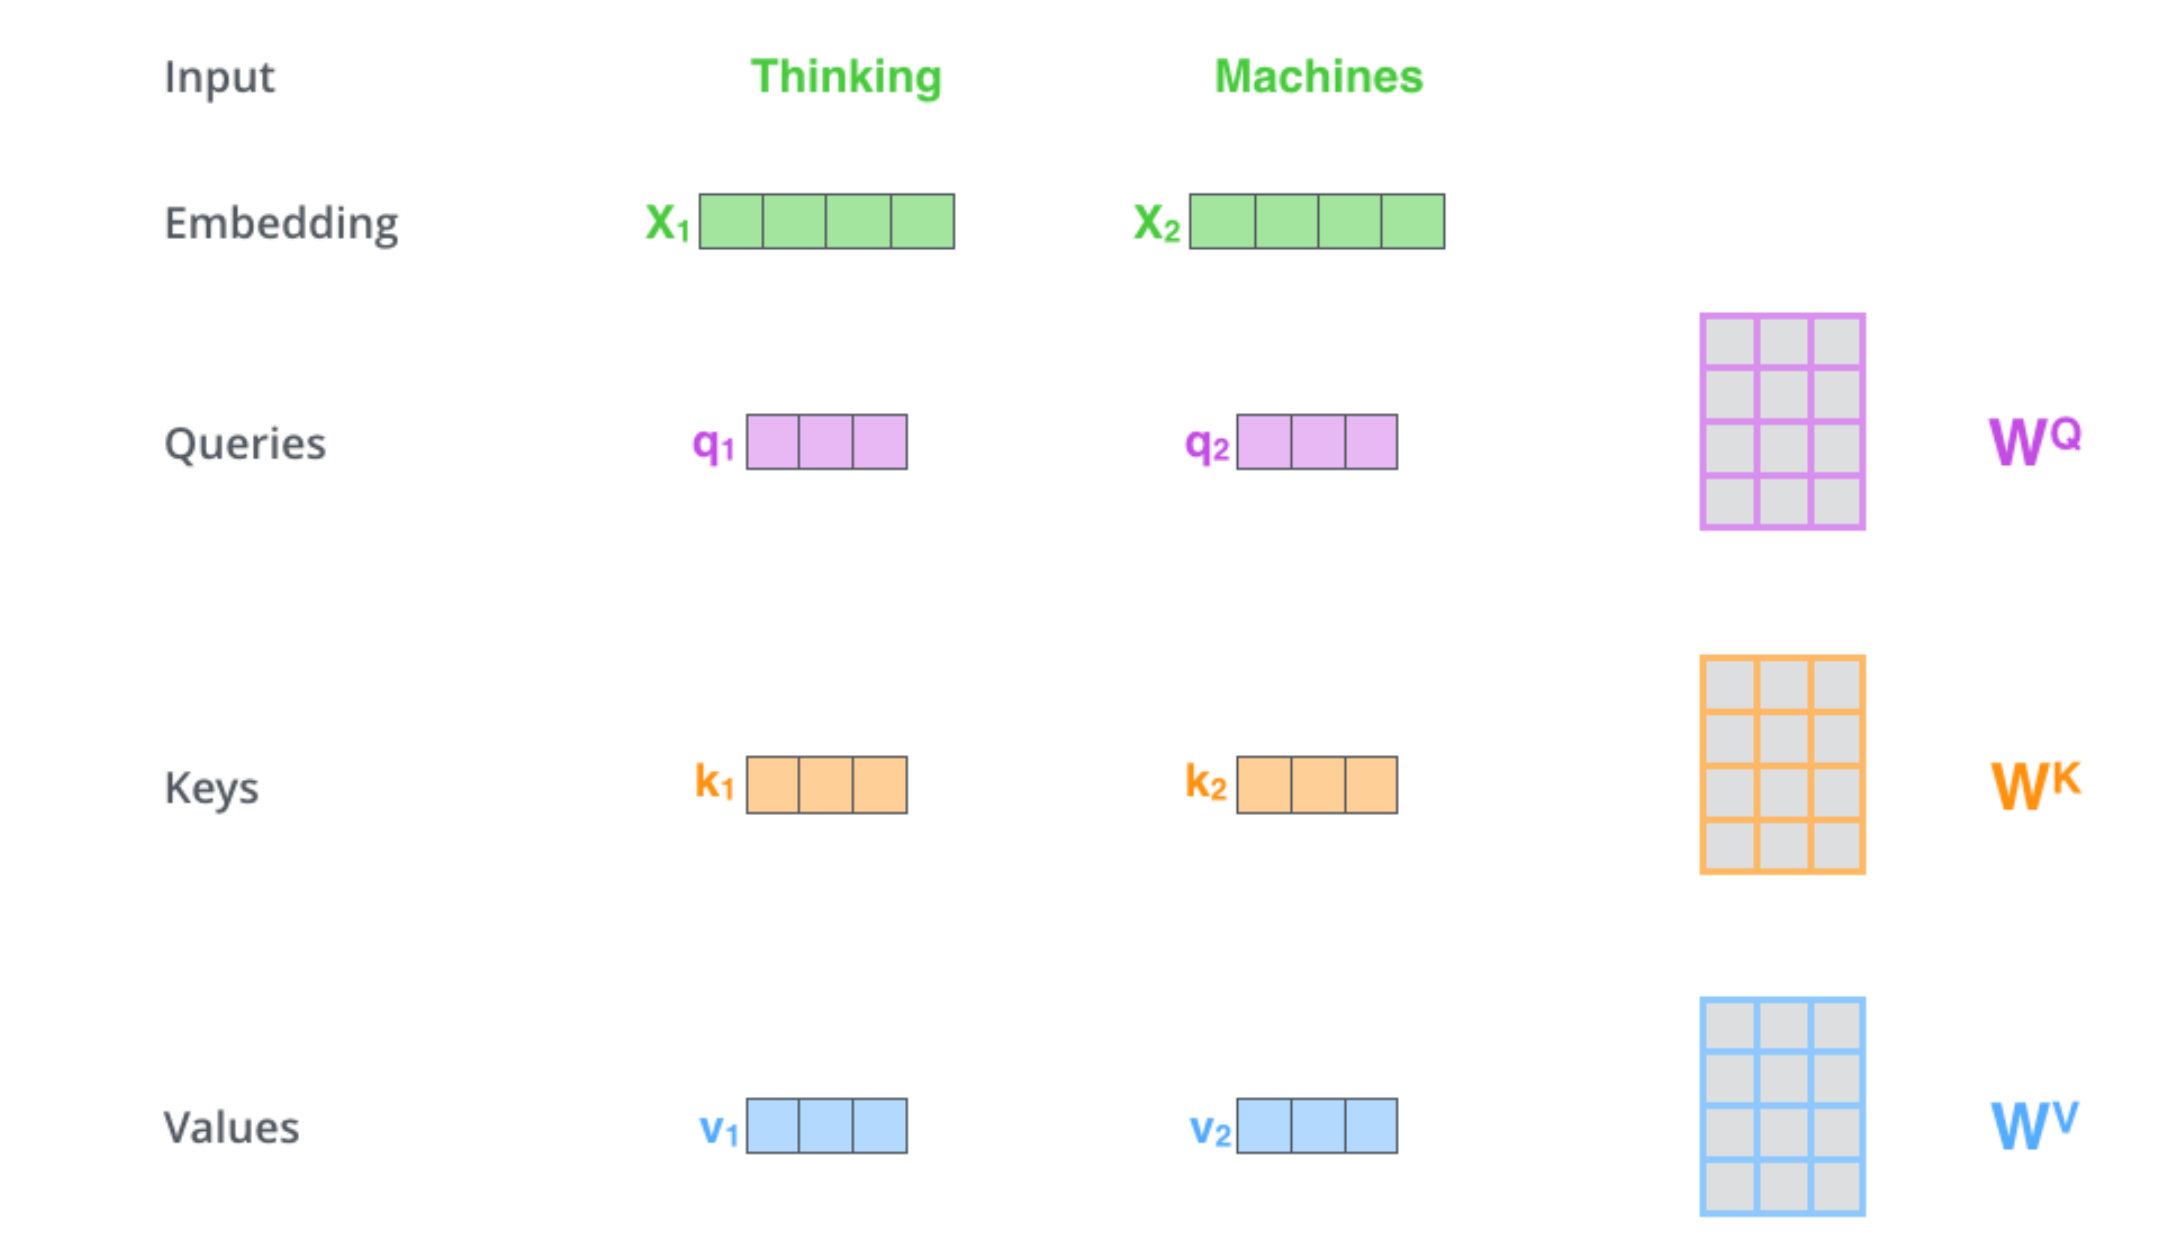

接下来，通过将 thinking 对应的 q 向量与各个单词（也包括 thinking 本身）的 k 向量的乘积来计算分数。分数越高，说明关系越<font color=#0099ff>密切</font>。

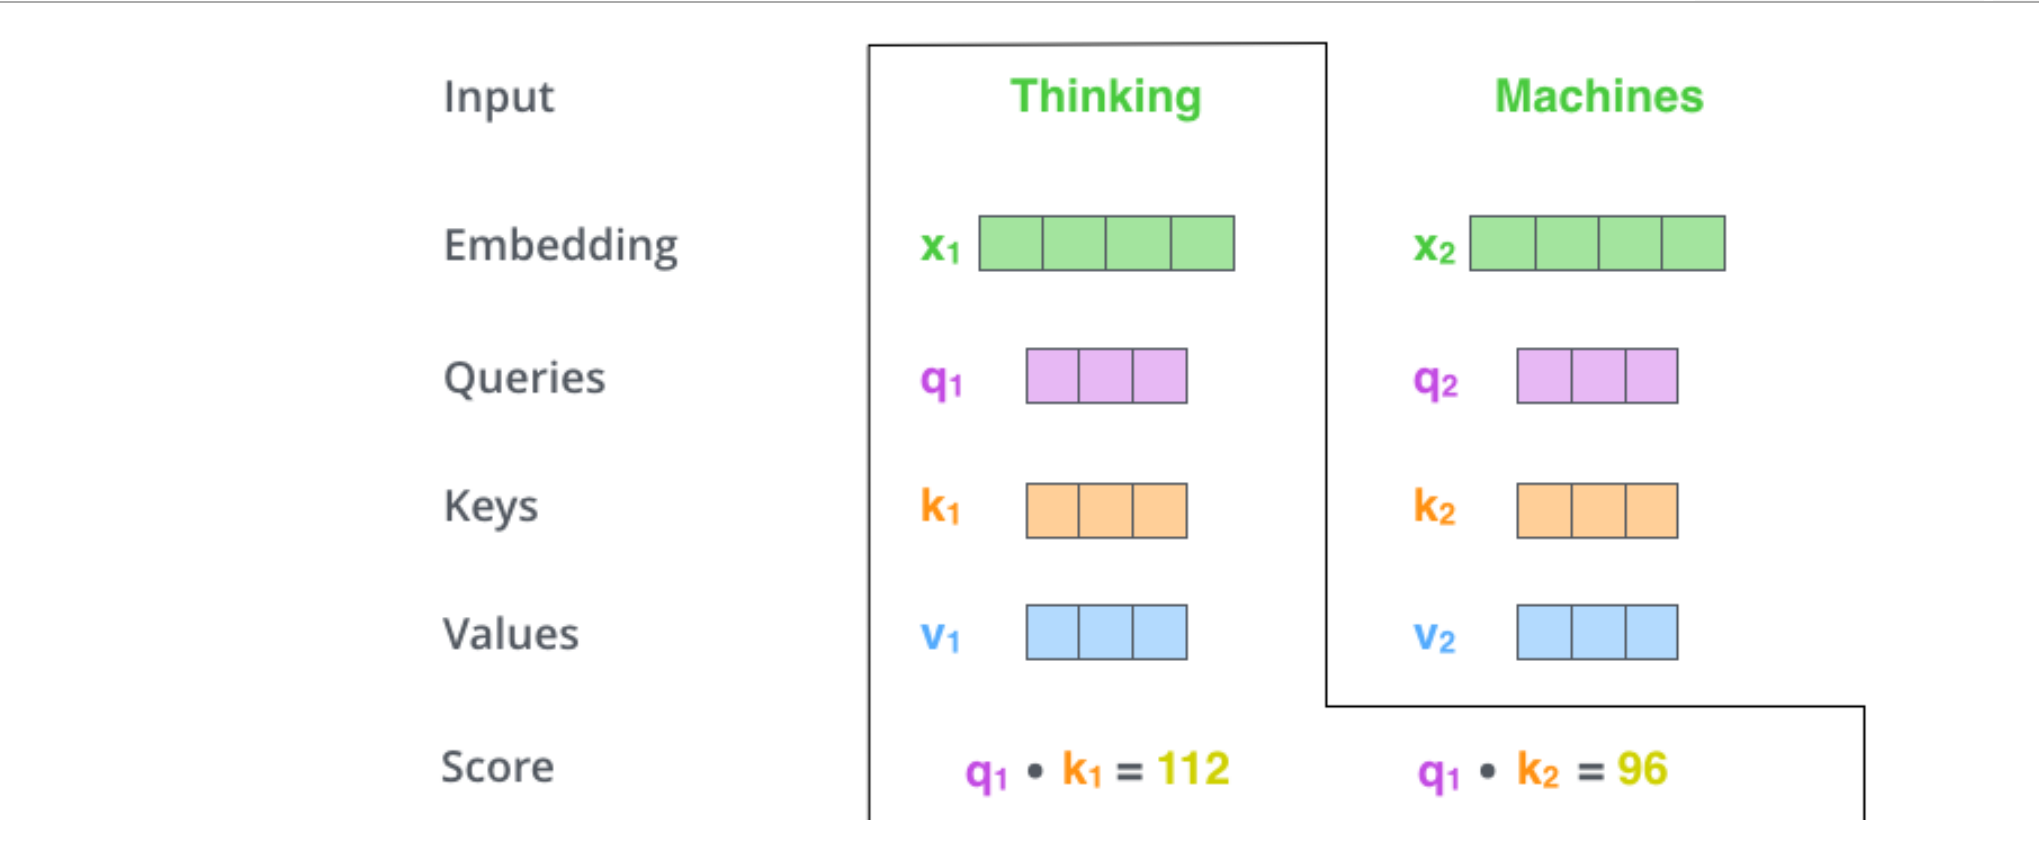

将分数缩小 $\sqrt{d_k}$ ，$d_k$ 表示键向量 key 的维度， 提出注意力机制的论文 Attention is all you need 中的 $d_k$ 为 64，因此下图中所示为 8，并通过 Softmax 操作转化为概率形式。一般认为，缩放具备<font color=#0099ff>分散注意力</font>的作用，如在本例中，若基于 112 和 96 进行 Softmax 的计算，Thinking 对 Thinking 所计算出的注意力概率接近于 1；而缩放后，注意力值就分散些，这样一般就获得更好的泛化能力。

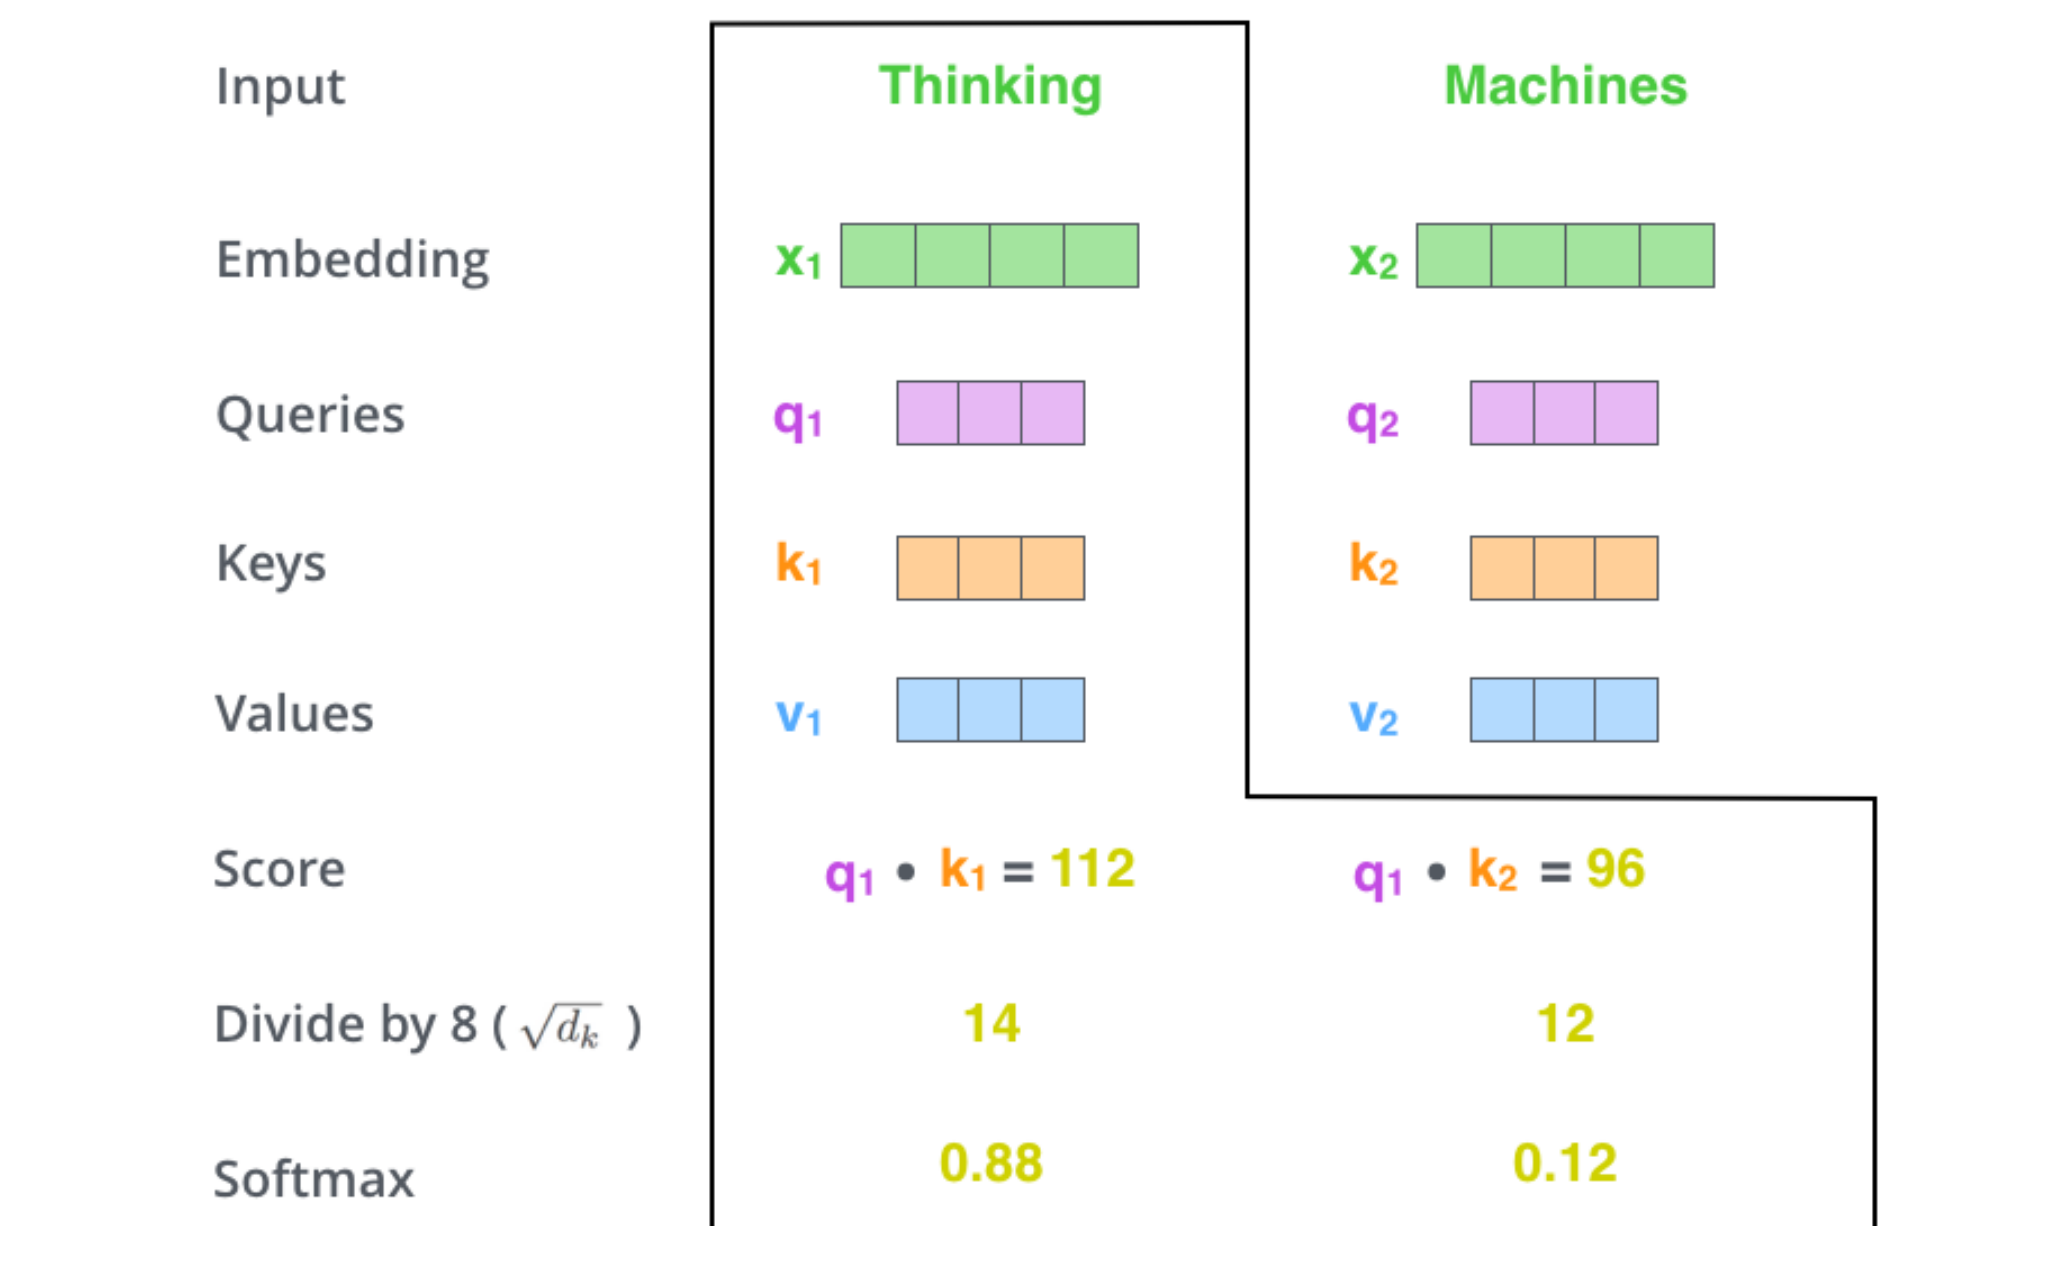

将每个 v 向量乘以对应概率值并求和，生成的向量 z 即为 thinking 带有语境的表征形式。 当然，在实际实现中，所有计算以矩阵形式进行，也就是所有的单词同时进行自注意力机制的运算。

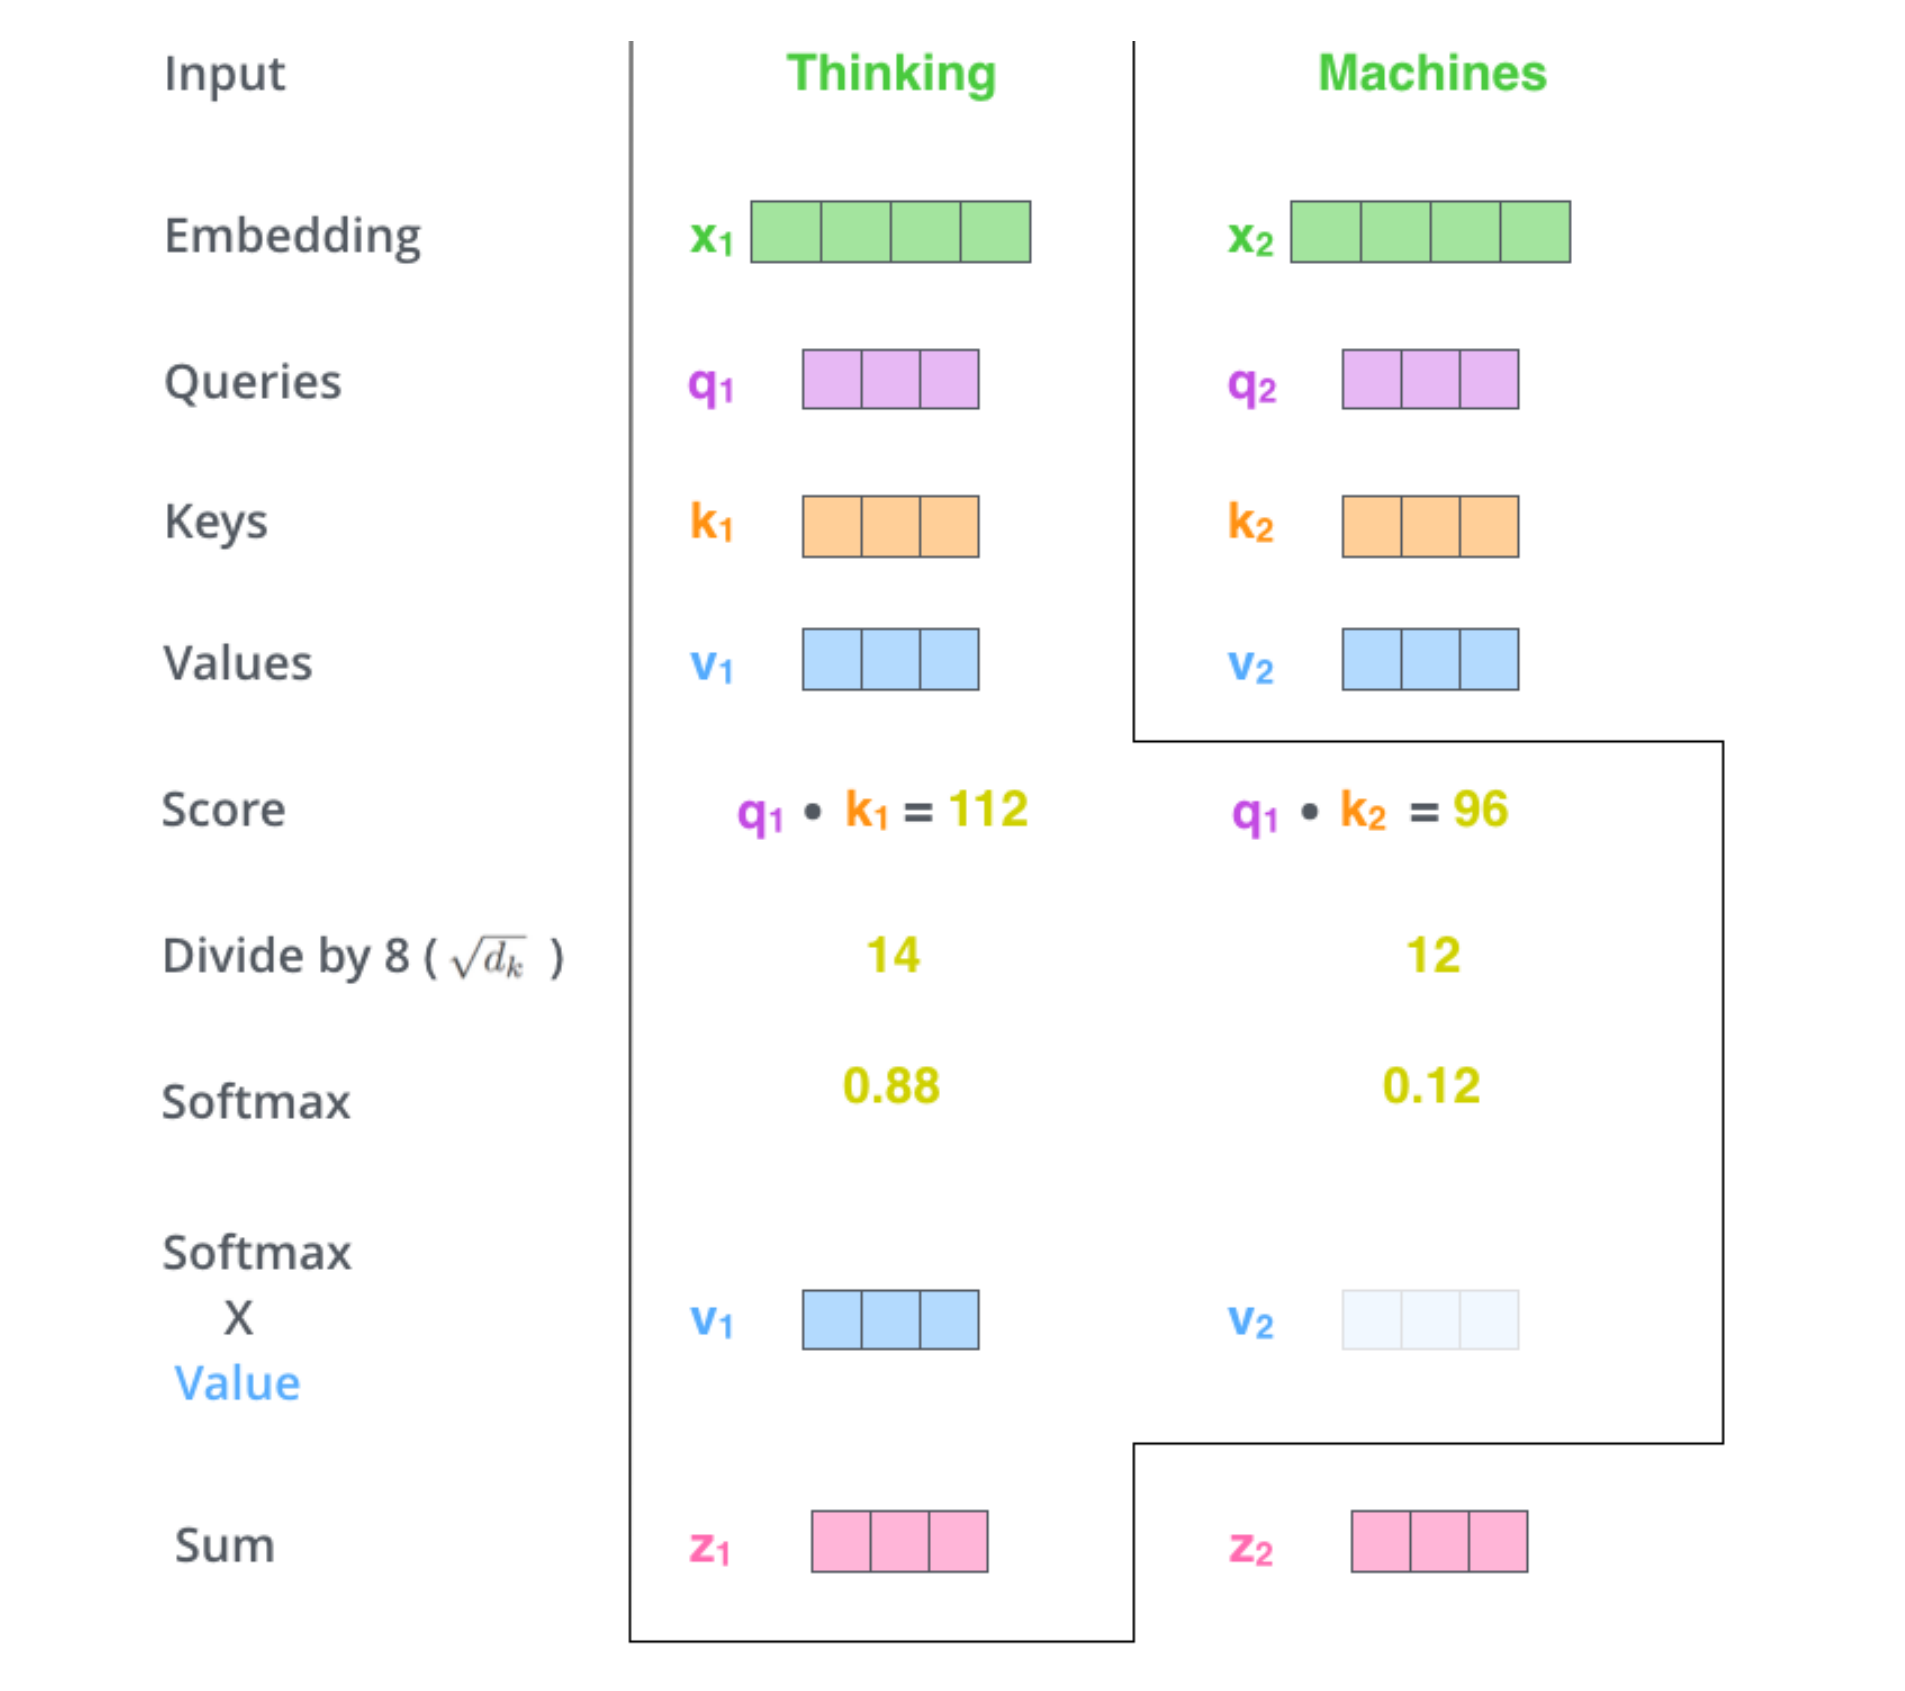

自注意力的矩阵综合计算图示如下：

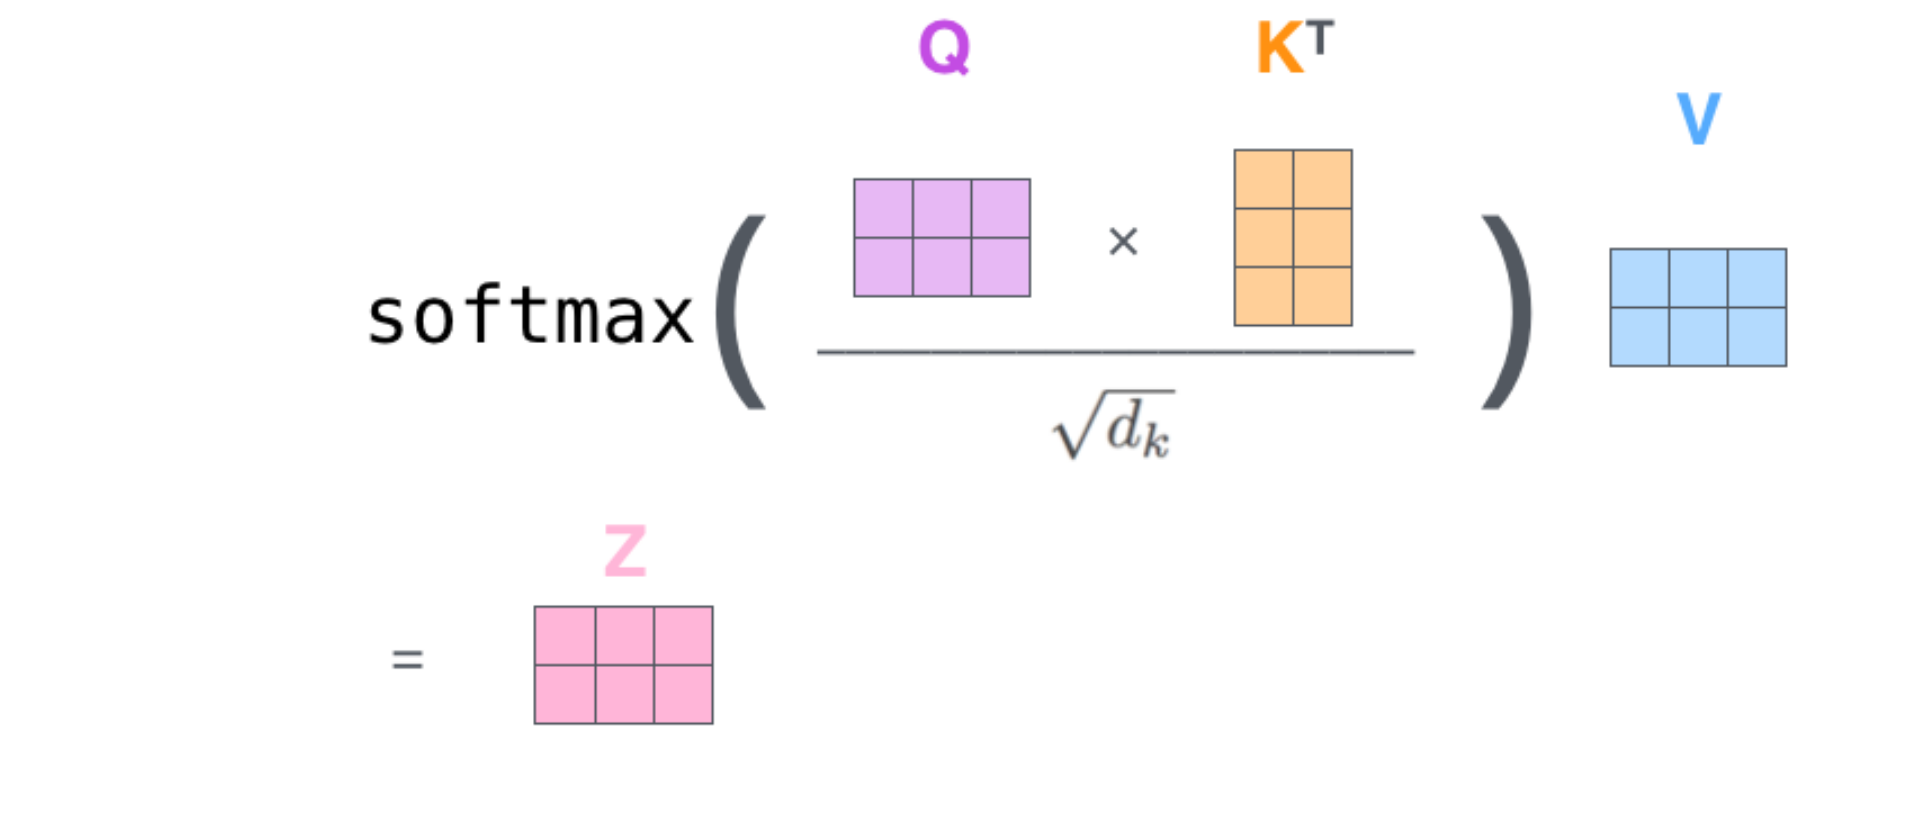

由于所有单词可以同时进行与其它单词间的注意力运算，因此相比如循环神经网络基于顺序的运算方式，速度有大幅度提升。再者，无论距离远近，均需计算两单词间的注意力，也解决了循环神经网络中长距离信息难以捕捉的困境。

当然，在以上过程中各单词并行运算，没有考虑到顺序关系，如何引入顺序特征呢？在基于自注意力机制的模型中，一般会对每个单词进行<font color=#0099ff>顺序编码</font>，再结合词向量作为综合的词汇表征。

### NLP 前沿模型

从 NLP 领域的特征抽取器角度来说，自注意力机制很大可能会逐步取代 RNN 成为最主流<font color=#0099ff>顺序编码</font>的的特征抽取器。事实上，在 Bert 之后的众多前沿模型无一不是基于自注意力机制，在训练数据、训练任务、层级结构等方面作相应改变而提出的。另一方面，两阶段的模式<font color=#0099ff>预训练+Finetuning</font>必将成为 NLP 领域研究和工业应用的流行方法，而这些前沿模型又因此统称为预训练模型。

简而言之，预训练模型可以基于训练任务划分为以下三个大类：

- 自回归模型（auto-regressive model）：经典的语言建模任务，<font color=#0099ff>根据已读取文本内容预测下一个单词</font>。比如 Transformer 的解码器，在训练阶段应用掩码机制，使得注意力计算过程中只能看到某个单词之前的内容，而没有后面的内容。尽管可以对这类预训练好的模型进行微调并在许多下游任务上取得出色的结果，但其最自然的应用是文本生成。这种模型的代表是 GPT 系列模型。
- 自编码模型 (auto-encoding model)：通过某种方式<font color=#0099ff>破坏</font>输入文本（比如 Bert 中对输入文本进行遮盖）并尝试<font color=#0099ff>重建</font>原始文本的方式进行预训练。从某种意义上讲，与 Transformer 的编码器相对应，因为它们无需任何掩码，每一个位置都可访问全部输入的内容。这些模型通常能建立整个句子的双向编码表示，可以对它们进行微调并在许多下游任务上取得出色的结果，其最自然的应用是句子分类或序列标注。此类模型的典型代表是 Bert。
- 序列到序列模型（seq2seq model）：将 Transformer 的编码器和解码器用于翻译任务或其它文本到文本问题，可以将它们微调成并适用于多种任务，但最自然的应用是翻译，摘要和问题解答。Transformer、T5 是此类模型的典型代表。

接下来简要介绍近些年来，在这三大预训练模型类型下的比较有代表性的模型。

#### 自回归模型

这类模型基于 Transformer 的解码器部分，使用注意力掩码机制使得每个当前位置只能看到之前的输入文本。

##### GPT 系列

- GPT：在 Book Corpus 数据集上预训练的第一个基于 Transformer 解码器的自回归模型，由 12 层 transformer 模块组成的，使用最后的隐藏层来做不同的任务。
- GPT-2：简单来说，GPT-2 就是基于 Transformer 架构的大规模模型。GPT-2 是 GPT 算法“进化版”，比 GPT 参数扩大 10 倍，达到了 15 亿个，数据量扩大 10 倍，使用了包含 800 万个网页的数据集，共有 40GB。
- GPT-3：是一个拥有 1750 亿个参数的 GPT-2 的放大版。研究者们希望 GPT-3 能够成为更通用化的 NLP 模型，解决当前 Bert 等模型的两个不足之处：对领域内有标记数据的过分依赖，以及对于领域数据分布的过拟合。GPT-3 致力于能够使用更少的特定领域数据，不做 fine-tuning 解决问题。

##### Reformer

Reformer 是一种综合许多技巧的自回归模型，可以减少内存占用和计算时间。这些技巧包括：

- 使用轴向位置编码（通过将其分解为较小的矩阵，可以避免具有巨大的位置编码矩阵（当序列长度很大时）的机制。
- 用 LSH（局部敏感哈希）注意代替传统注意力机制，有效提升自注意力层的计算速度。
- 避免通过在反向传递过程中使用可逆的转换器层来获取每一层的中间结果（从下一层的输入中减去残差将其返回），或者针对给定层内的结果重新计算它们（效率不如存储它们）但可以节省内存）。
- 按块而不是整个批次计算前馈操作。

##### XLNet

严格意义上来说，XLNet 不是传统的自回归模型，而是使用了基于此训练策略的一种模型。XLNe t作为 Bert 的升级模型，主要在以下三个方面进行了优化：

- 不需要添加 Mask，输入的文本“打乱顺序”，并且采用自回归模型替代自动编码模型，使得某一单词的前面位置可能存在上下文词汇，既可以针对上下文进行编码，又解决 Mask 带来的负面影响（训练与微调阶段的 gap）。
- 在具体实现过程中，引入双流注意力机制。
- 引入 Transformer-XL 可针对长文本。

#### 自编码模型

这部分模型依赖于原始 Transformer 的编码器部分，并且不使用任何 Mask，因此该模型可以查看输入文本的所有内容。对于预训练阶段，目标是原始句子，输入是其损坏的版本。

##### Bert

里程碑式的模型，MLM（Masked Language Model） 作为训练任务之一，即通过使用随机屏蔽来破坏输入，让模型预测原来的单词，更准确地说，在预训练期间，15％ 的内容被以下方式屏蔽：<font color=#0099ff>80% 情况下使用 Mask 掉这个词，10% 情况下采用一个任意词替换，剩余 10% 情况下保持原词汇不变</font>。优点在于：

- 被随机选择 15% 的词当中以 10% 的概率用任意词替换去预测正确的词，相当于文本纠错任务，为 BERT 模型赋予了一定的文本纠错能力。
- 被随机选择 15% 的词当中以 10% 的概率保持不变，缓解了 finetune 时候与预训练时候输入不匹配的问题（预训练时候输入句子当中有 Mask，而finetune 时候输入是完整无缺的句子，即为输入不匹配问题）。

除了模型必须预测原始句子的目标以外，还存在第二个目标 NSP（Next Sentence Prediction）：输入是两个句子 A 和 B（之间有一个分隔标记）。句子对有 50％ 的概率连续，50％ 的概率不相关。该模型必须预测句子是否连续。

##### Albert

该模型提出了两种减少内存的方法，同时提升了训练速度，其次改进了 Bert 中的 NSP 的预训练任务：

- 对 Embedding 因式分解（Factorized embedding parameterization）
- 跨层的参数共享（Cross-layer parameter sharing）
- 引入句间连贯（Inter-sentence coherence loss）任务

Bert 的 NSP 任务实际上是一个二分类，训练数据的正样本是通过采样<font color=#0099ff>同一个文档中</font>的两个连续的句子，而负样本是通过采用两个<font color=#0099ff>不同</font>的文档的句子。该任务主要是希望能提高下游任务的效果，例如自然语言推理任务。但是后续的研究发现该任务效果并不好，主要原因是因为其任务过于<font color=#0099ff>简单</font>。这是因为<font color=#0099ff>非上下文关系的负样本来自不同文档</font>，只要通过<font color=#0099ff>主题一致性</font>预测，便能知道句子是否为上下文关系，而设计 NSP 的本意是为了预测两个句子是否为上下文，因此也许并不必要。而句间连贯任务的负样本是将为上下文的句子对顺序进行<font color=#0099ff>调换</font>，增加了任务难度，能够避免模型通过主题一致性来预测上下文关系。

##### RoBERTa

从模型上来说，RoBERTa 基本没有什么太大创新，主要是在 Bert 基础上做了几点调整： 

- 训练时间更长，batch size 更大，训练数据更多。
- 移除了 NSP 任务。
- 训练序列更长。
- 动态调整 Mask 机制，一开始把预训练的数据复制 10 份，每一份都随机选择 15% 的 Tokens 进行 Mask，也就是说，同样的一句话有 10 种不同的 Mask 方式。然后每份数据都训练 N/10 个 epoch。这就相当于在这 N 个 epoch 的训练中，每个序列的被 Mask 的 tokens 是会变化的。

##### ELECTRA

ELECTRA 最主要的贡献是提出了新的预训练任务和框架，把生成式的 Masked language model(MLM) 预训练任务改成了<font color=#0099ff>判别式</font>的 Replaced token detection(RTD) 任务，判断当前 token 是否被语言模型替换过。

#### 序列到序列模型

如前所述，这些模型保留原始 Transformer 的编码器和解码器。

##### BART

具有编码器和解码器的序列到序列模型。编码器解析被遮盖掉某些单词的文本，解码器遮盖掉将来的单词。对于编码器，在预训练任务上，将应用以下转换方式的组合：

- 随机遮盖单词
- 删除随机单词
- 用单个掩码遮盖 k 个单词的范围
- 打乱句子顺序
- 旋转文档以使其从特定标记开始

##### T5

使用传统的 Transformer，为了能够处理所有 NLP 任务，使用特定的前缀将它们转换为 text-to-text 的问题：“摘要：”，“问题：”，“将英语翻译为德语：”等等。预训练包括监督训练和自监督训练。

### NLP 前沿库 transformers

transformers 实现并探索了各种最先进的 NLP 模型，如 Bert、GPT-2、Transformer-XL 和 XLNet。用户可非常方便地调用现在非常流行的种语言模型进行微调和应用，且同时兼容 TensorFlow2.0 和 PyTorch 两大框架，非常方便快捷。

只用两三行代码，就可以应用 transformers 中的基准模型，完成一些基本的文本任务，比如摘要、生成等。

情感分析：

```python
from transformers import pipeline

emotion_classifier = pipeline('sentiment-analysis')
emotion_classifier('what a nice day')
```

由于需要下载 pipeline 相关的模型，所以耗时较长，可选择网速快的环境运行以上代码，下同。

命名实体识别：

```python
ner = pipeline('ner')
ner("Hugging Face is a French company based in New-York.")
```

英翻法：

```python
translator = pipeline('translation_en_to_fr')
translator("HuggingFace is a French company that is based in New York City. HuggingFace's mission is to solve NLP one commit at a time")
```

文本摘要：

```python
TEXT_TO_SUMMARIZE = """ 
New York (CNN)When Liana Barrientos was 23 years old, she got married in Westchester County, New York. 
A year later, she got married again in Westchester County, but to a different man and without divorcing her first husband. 
Only 18 days after that marriage, she got hitched yet again. Then, Barrientos declared "I do" five more times, sometimes only within two weeks of each other. 
In 2010, she married once more, this time in the Bronx. In an application for a marriage license, she stated it was her "first and only" marriage. 
Barrientos, now 39, is facing two criminal counts of "offering a false instrument for filing in the first degree," referring to her false statements on the 
2010 marriage license application, according to court documents. 
Prosecutors said the marriages were part of an immigration scam. 
On Friday, she pleaded not guilty at State Supreme Court in the Bronx, according to her attorney, Christopher Wright, who declined to comment further. 
After leaving court, Barrientos was arrested and charged with theft of service and criminal trespass for allegedly sneaking into the New York subway through an emergency exit, said Detective 
Annette Markowski, a police spokeswoman. In total, Barrientos has been married 10 times, with nine of her marriages occurring between 1999 and 2002. 
All occurred either in Westchester County, Long Island, New Jersey or the Bronx. She is believed to still be married to four men, and at one time, she was married to eight men at once, prosecutors say. 
Prosecutors said the immigration scam involved some of her husbands, who filed for permanent residence status shortly after the marriages. 
Any divorces happened only after such filings were approved. It was unclear whether any of the men will be prosecuted. 
The case was referred to the Bronx District Attorney\'s Office by Immigration and Customs Enforcement and the Department of Homeland Security\'s 
Investigation Division. Seven of the men are from so-called "red-flagged" countries, including Egypt, Turkey, Georgia, Pakistan and Mali. 
Her eighth husband, Rashid Rajput, was deported in 2006 to his native Pakistan after an investigation by the Joint Terrorism Task Force. 
If convicted, Barrientos faces up to four years in prison.  Her next court appearance is scheduled for May 18.
"""
summarizer = pipeline('summarization')
summarizer(TEXT_TO_SUMMARIZE)
```

当然，除了基准模型，也可以基于自定义模型，即加载已下载至本地的预训练好的模型，进行相关任务处理。在以下案例中，我们希望基于预训练中文 Bert 模型 `bert_wwm_pretrain` 对文本进行编码表征。

先下载并解压线上环境中的模型压缩包：

In [ ]:
!wget -nc "https://labfile.oss.aliyuncs.com/courses/3382/bert_wwm_pretrain.zip"  
!unzip "bert_wwm_pretrain.zip"  

首先将待表征文本进行分词：

<i class="fa fa-arrow-circle-down" aria-hidden="true"> 教学代码：</i>

In [ ]:
import torch
from transformers import BertTokenizer

# 加载中文预训练 Bert 模型的 tokenizer
tokenizer_bert = BertTokenizer.from_pretrained('bert_wwm_pretrain')

# 对输入进行 tokenize
text = "[CLS] 我是谁？ [SEP] 我在哪里？ [SEP]"
tokenized_text = tokenizer_bert.tokenize(text)
print(tokenized_text)  # 查看分词后的句子

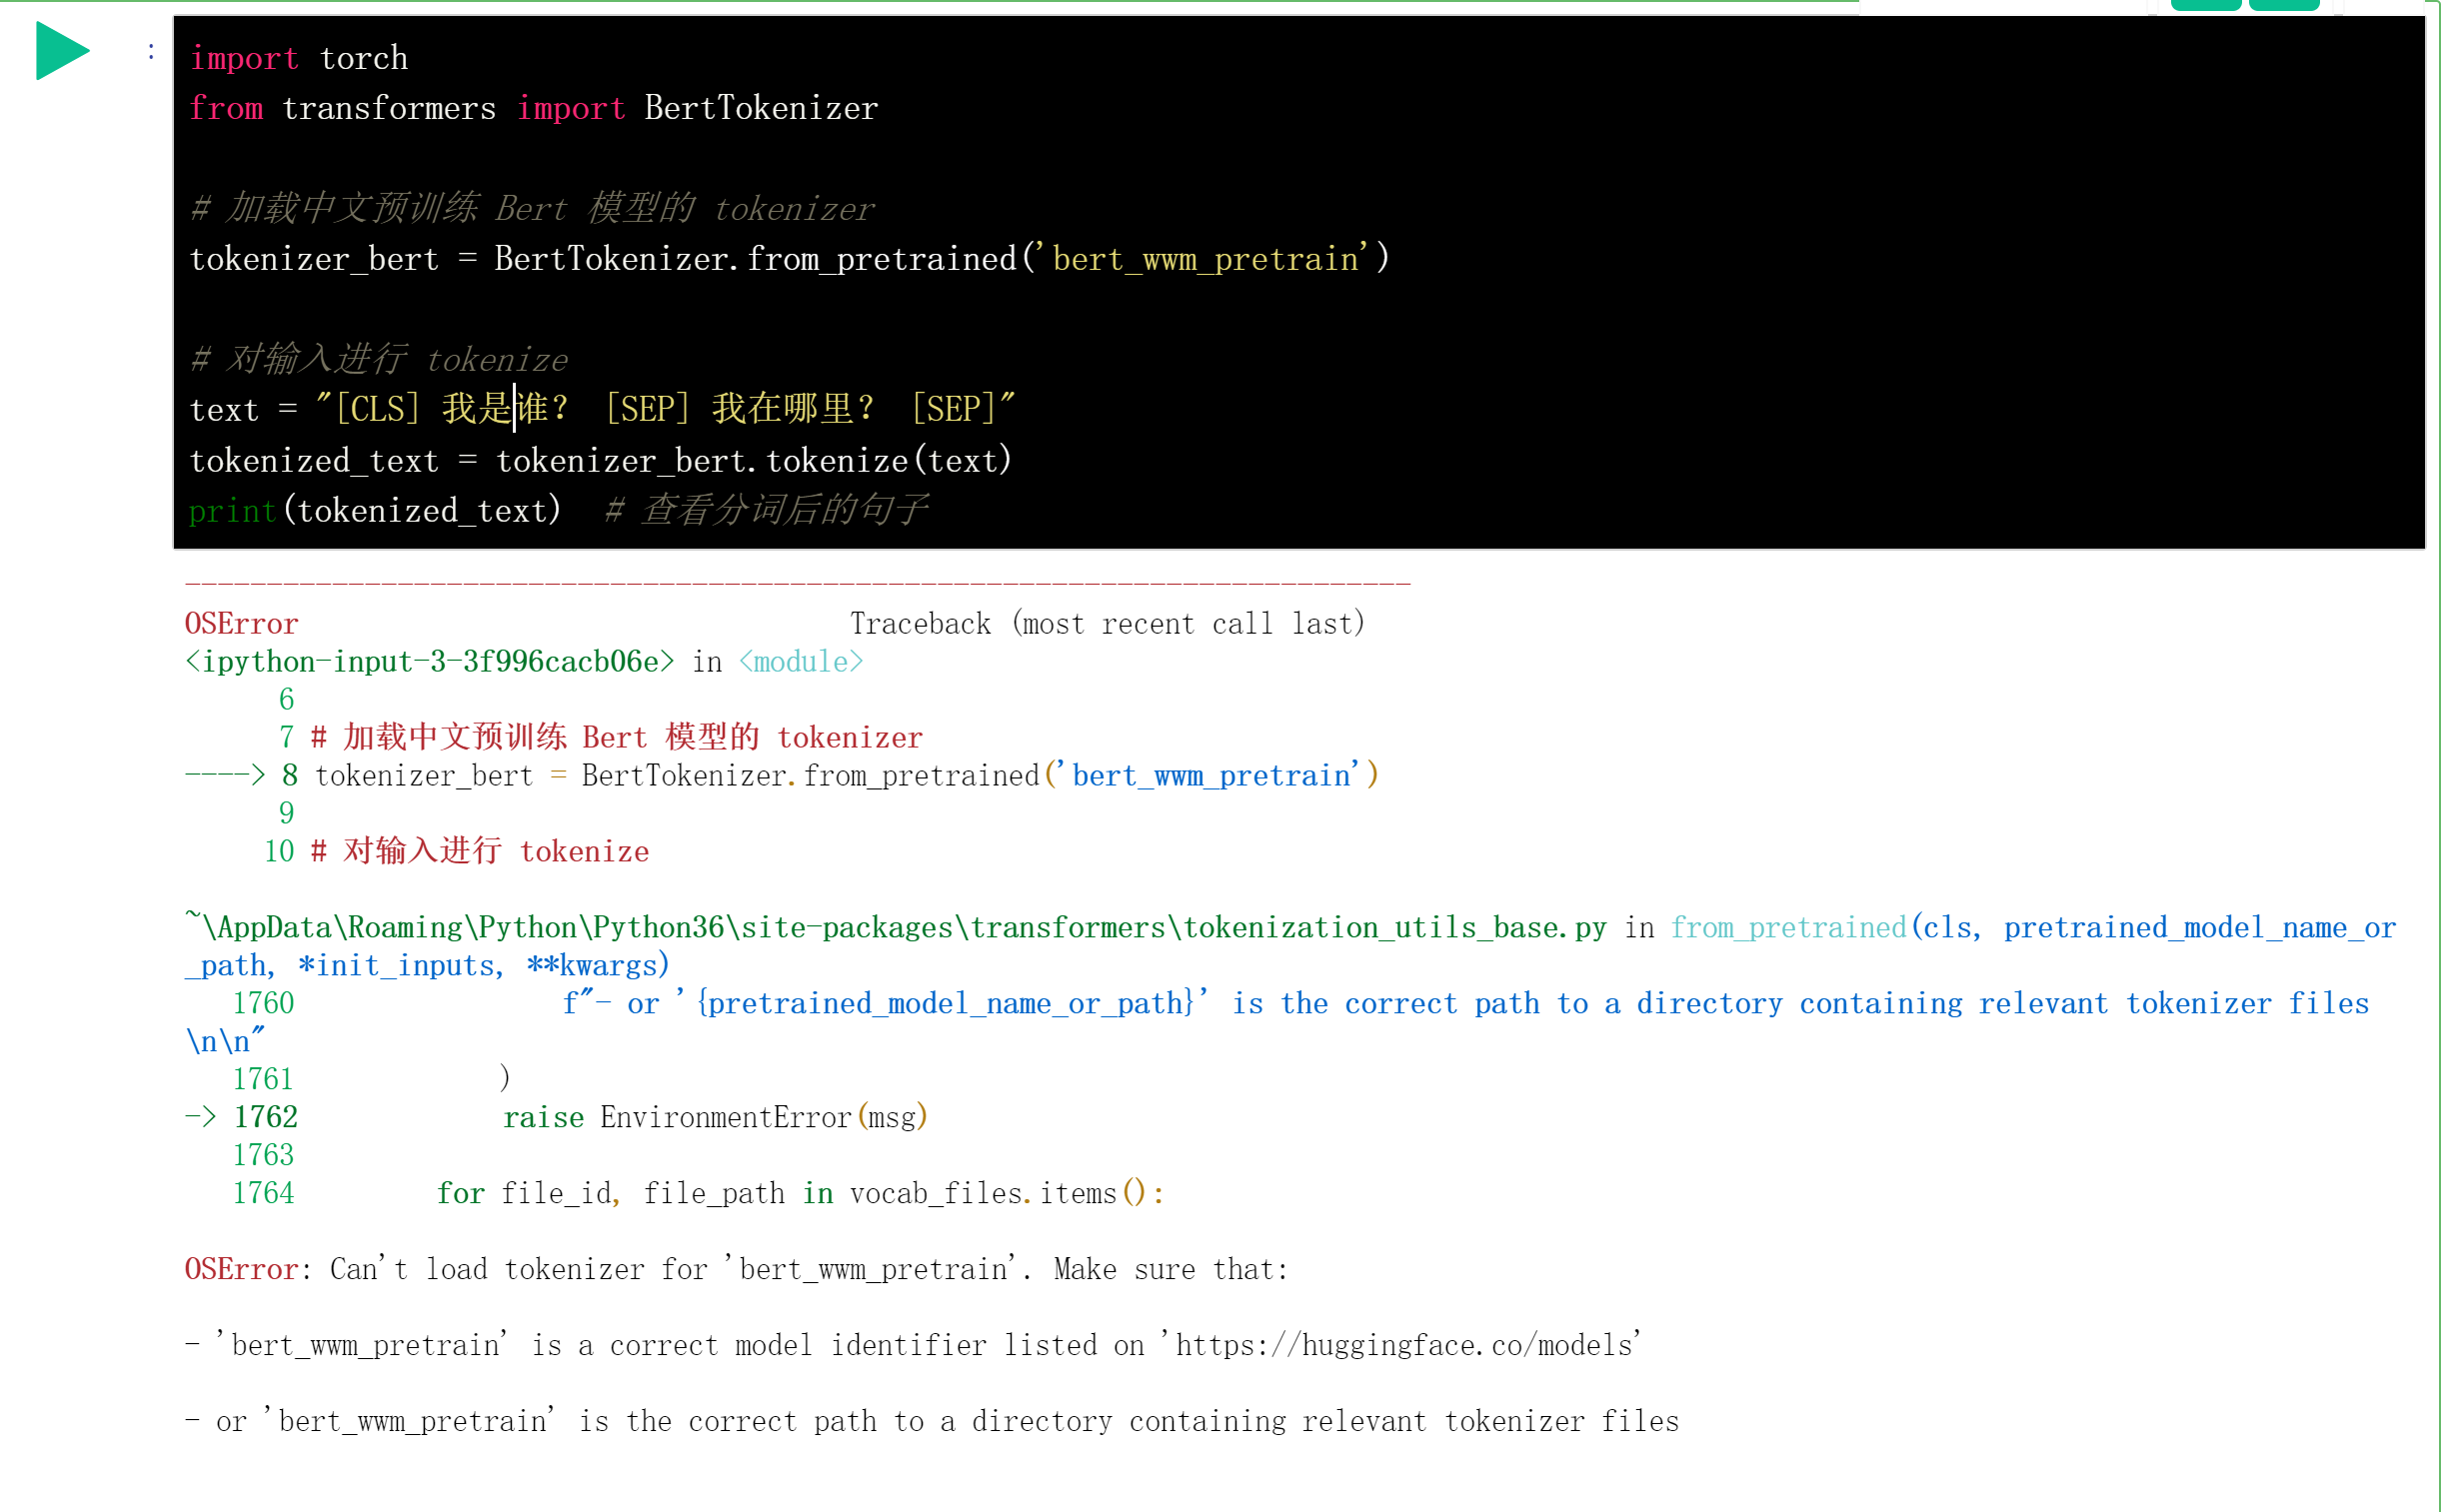

<i class="fa fa-arrow-circle-down" aria-hidden="true"> 动手练习：</i>

接下来将文本转换为 id 并且转化成 tensor 的形式。同时，由于 bert 还带有 Next Sentence Prediction 任务，还需要准备句子类型相关的向量 `segments_ids`。

In [ ]:
# 将文本中的单词转化为对应的 id
indexed_tokens = tokenizer_bert.convert_tokens_to_ids(tokenized_text)
# 句子类型相关的 id，第一个句子中的单词对应的 segment id 为 0（包括第一个 [SEP]），第二个的为 1
segments_ids = [0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1]

# 转换为 tensors
tokens_tensor = torch.tensor([indexed_tokens])
segments_tensors = torch.tensor([segments_ids])
print(tokens_tensor)
print(segments_tensors)

加载模型：

In [ ]:
from transformers import BertModel

# 加载中文预训练 Bert 模型
model = BertModel.from_pretrained('bert_wwm_pretrain')

# 将模型设置为预测模式
model.eval()

# 如果有 GPU, 将数据与模型转换到 cuda
DEVICE = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")  # 运行环境
tokens_tensor = tokens_tensor.to(DEVICE)
segments_tensors = segments_tensors.to(DEVICE)
model.to(DEVICE)
print(model)


最后调用模型，进行文本编码：

In [ ]:
# 对输入进行编码
with torch.no_grad():
    outputs = model(tokens_tensor, token_type_ids=segments_tensors)
    # 取最后一层的输出
    encoded_layers = outputs[0]
print(encoded_layers.shape)
# 句子编码后，大小为： (batch size, sequence length, model hidden dimension)
assert tuple(encoded_layers.shape) == (
    1, len(indexed_tokens), model.config.hidden_size)

编码后的向量可看作文本语义表征，再可以根据具体任务接相应的下游层（如文本分类），也可以直接用于比较文本间的相似度（如文本匹配）。

前面提到，Bert 在预训练阶段还带有 Next Sentence Prediction 任务，因此可以天然地做输入文本是否相关的任务。对于以上输入"[CLS] 我是谁？ [SEP] 我在哪里？ [SEP]"，可直接预测两句子是否相关。

In [ ]:
from transformers import BertForNextSentencePrediction

# 加载中文预训练 Bert 模型
model_nsp = BertForNextSentencePrediction.from_pretrained('bert_wwm_pretrain')

model_nsp.eval()
model_nsp.to(DEVICE)
print(model_nsp)

对输入进行相关性预测：

In [ ]:
with torch.no_grad():
    outputs = model_nsp(tokens_tensor, token_type_ids=segments_tensors)
print(outputs)

是否相关为二分类问题，因此输出为二维向量。

除了 NSP，Bert 的另一大任务是基于上下文的单词预测，也就是所谓的“完型填空”，也可以将输入文本进行遮盖，让模型预测被遮盖的单词。

In [ ]:
# Mask 文本中的某一词汇，之后进行预测
masked_index = 3
tokenized_text[masked_index] = '[MASK]'
print(tokenized_text)

加载模型：

In [ ]:
from transformers import BertForMaskedLM

# 加载中文预训练 Bert 语言模型
model_lm = BertForMaskedLM.from_pretrained('bert_wwm_pretrain')
model_lm.eval()
model_lm.to(DEVICE)
print(model_lm)

预测被 MASK 的单词：

In [ ]:
# 单词预测
with torch.no_grad():
    outputs = model_lm(tokens_tensor, token_type_ids=segments_tensors)
    predictions = outputs[0]

# 预测被 MASK 的单词
predicted_index = torch.argmax(predictions[0, masked_index]).item()
predicted_token = tokenizer_bert.convert_ids_to_tokens([predicted_index])[0]
print(predicted_token)

基于 transformers, 研究者可以共享训练过的模型，而不用总是重新训练；而实践者可以减少计算时间和制作成本，这是 NLP 工程师需要熟练使用的库。

更多复杂用法可参考 [<i class="fa fa-external-link-square" aria-hidden="true"> transformers 教程</i>](https://github.com/huggingface/transformers)。

### 实验总结

如今，大部分的前沿预训练模型均以自注意力机制为基础，基于大规模数据进行预训练，为众多下游应用任务提供了基本的语言理解基础，也对下游数据量的要求有所减少，可以说是继循环神经网络之后 NLP 领域的又一大里程碑式进程。

本实验的主要知识点如下：

- 参数设计及数据预处理
- Bert 中文预训练模型
- 训练及测试

作为一名 NLP 工程师，能够熟悉地利用各种预训练模型，应用于下游任务的能力是必要的，在下一实验中，我们将基于预训练的 Bert 模型，进行房产数据分类的实践。